In [3]:
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

Set your Goals!


Calories goal: 5000
Protein goal: 400
Carbs goal: 500
Fat goal: 250



  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) A


Adding new food


Name: Banana x 10
Calories: 300
Protein: 40
Fat: 12
Carbs: 50


Food item successfully added!

  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) Steak



Invalid Choice!!

  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) A


Adding new food


Name: Steak
Calories: 2000
Protein: 150
Fat: 120
Carbs: 50


Food item successfully added!

  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) A


Adding new food


Name: Bread Rolls
Calories: 300
Protein: 36
Fat: 0
Carbs: 12


Food item successfully added!

  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) A


Adding new food


Name: Rice and Chicken
Calories: 1200
Protein: 300
Fat: 90
Carbs: 190


Food item successfully added!

  A)Add new Food
  B)Visualise Progress
  Q)Quit


Choose an Option (A, B , Q) B


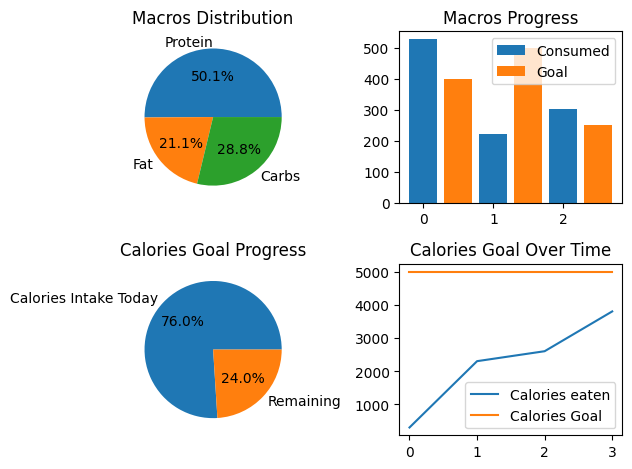


  A)Add new Food
  B)Visualise Progress
  Q)Quit


In [ ]:
# Default Input
default_goals = {
    "Calories_goal_limit": 2500,
    "Protein_goal": 50,
    "Carbs_goal": 200,
    "Fat_goal": 50
}

#User Input

print("Set your Goals!")
Calories_goal_limit = int(input("Calories goal:"))
Protein_goal = int(input("Protein goal:"))
Carbs_goal = int(input("Carbs goal:"))
Fat_goal = int(input("Fat goal:"))
today = [] 

if Calories_goal_limit < 100 or Protein_goal < 5 or Carbs_goal < 5 or Fat_goal < 5:
    print("Values too low, using default values goal")
else:
    default_goals = {
        "Calories_goal_limit": Calories_goal_limit,
        "Protein_goal": Protein_goal,
        "Carbs_goal": Carbs_goal,
        "Fat_goal": Fat_goal
    }

@dataclass
class Food:
  name : str
  calories: int
  protein: int
  carbs :int
  fat: int

done = False

while not done:
    print ("""
  A)Add new Food
  B)Visualise Progress
  Q)Quit""")
    choice = input("Choose an Option (A, B , Q)") # Choice input
    
    #Input Data
    if choice == "A":
        print ("Adding new food")
        name = input("Name:")
        calories = int(input("Calories:"))
        protein = int(input("Protein:"))
        fat = int(input("Fat:"))
        carbs = int(input("Carbs:"))
        food = Food(name,calories,protein,carbs,fat)
        print("Food item successfully added!")
        today.append(food)
   
    
    # Input and Visualise    
    elif choice == "B":
        calories_sum = sum(food.calories for food in today)
        calorie_diff = max(Calories_goal_limit - calories_sum, 0) # avoid negative x values for plotting in case of overshoot
        fat_sum = sum(food.fat for food in today)
        protein_sum = sum(food.protein for food in today)
        carbs_sum = sum(food.carbs for food in today)
        
        fig, axs = plt.subplots(2, 2)
        axs[0, 0].pie([protein_sum,fat_sum,carbs_sum], labels = ["Protein", "Fat","Carbs"], autopct ="%1.1f%%")
        axs[0, 0].set_title("Macros Distribution")
        axs[0, 1].bar([0, 1, 2],[protein_sum,fat_sum,carbs_sum], width = 0.4, label = "Consumed")
        axs[0, 1].bar([0.5, 1.5, 2.5], [Protein_goal,Carbs_goal, Fat_goal], width = 0.4, label = "Goal")
        axs[0, 1].legend()
        axs[0, 1].set_title("Macros Progress")
        axs[1, 0].pie([calories_sum, calorie_diff], labels = ["Calories Intake Today", "Remaining"], autopct = "%1.1f%%")
        axs[1, 0].set_title("Calories Goal Progress")
        axs[1, 1].plot(list(range(len(today))), np.cumsum([food.calories for food in today]), label = "Calories eaten")
        axs[1, 1].plot(list(range(len(today))), [Calories_goal_limit] * len (today), label = "Calories Goal")
        axs[1, 1].legend()
        axs[1, 1].set_title("Calories Goal Over Time")
        fig.tight_layout()
        plt.show()
    
    # Exit system
    elif choice == "Q":
        done = True
    
    # Invalid Input
    else:
        print("\nInvalid Choice!!")
